# Malaria Disease Detection using Deep Learnig with FLask App

In [ ]:
import os
from PIL import Image

In [ ]:
# Define correct paths
parasitized_path = "Dataset/Parasitized"
uninfected_path = "Dataset/Uninfected"

# Get image sizes
x1 = min(Image.open(os.path.join(parasitized_path, f)).size for f in os.listdir(parasitized_path) if f.endswith(('.png', '.jpg', '.jpeg')))
x2 = max(Image.open(os.path.join(parasitized_path, f)).size for f in os.listdir(parasitized_path) if f.endswith(('.png', '.jpg', '.jpeg')))
y1 = min(Image.open(os.path.join(uninfected_path, f)).size for f in os.listdir(uninfected_path) if f.endswith(('.png', '.jpg', '.jpeg')))
y2 = max(Image.open(os.path.join(uninfected_path, f)).size for f in os.listdir(uninfected_path) if f.endswith(('.png', '.jpg', '.jpeg')))

In [ ]:
print(x1,x2,y1,y2)

(46, 79) (394, 241) (49, 58) (247, 139)


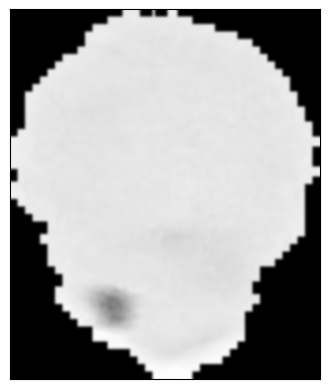

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('Dataset/Parasitized/C101P62ThinF_IMG_20150918_151942_cell_62.png',0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

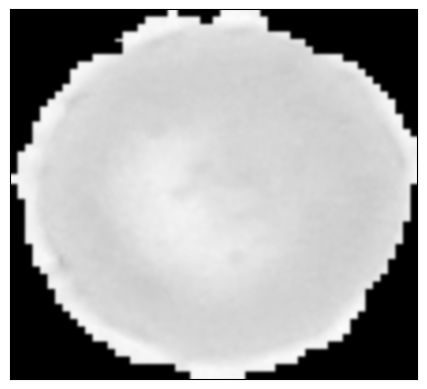

In [ ]:
img = cv2.imread('Dataset/Uninfected/C99P60ThinF_IMG_20150918_141520_cell_73.png',0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [ ]:
from tensorflow import keras

In [ ]:
keras.backend.set_image_data_format('channels_last')

In [ ]:
import numpy as np
import pandas as pd
import math
import cv2

from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Input, Dense, Activation, ZeroPadding2D, BatchNormalization,
    Flatten, Conv2D, MaxPooling2D, AveragePooling2D, Dropout,
    GlobalMaxPooling2D, GlobalAveragePooling2D
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import get_file
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import tensorflow.keras.backend as K

# Set image data format
K.set_image_data_format('channels_last')


In [ ]:
train_dir = 'Dataset/'
image_size = 150
shift=0.25

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.15,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest",
    validation_split=0.2
)


train_set = train_datagen.flow_from_directory(train_dir, target_size=(image_size, image_size), color_mode='rgb', classes=None,
                                              class_mode='categorical', batch_size=256, shuffle=True, seed=None,
                                              save_to_dir=None, save_prefix='', save_format='png', follow_links=False,
                                              subset='training', interpolation='nearest')
validation_generator = train_datagen.flow_from_directory(train_dir, target_size=(image_size, image_size),
                                                         batch_size=256, class_mode='categorical', subset='validation')

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


In [ ]:
(train_set[0][0].shape)

(256, 150, 150, 3)

In [ ]:
nTrain = 22048
nVal = 5510
train_steps = nTrain//256
vaid_steps = nVal//256

In [ ]:
from keras.applications.mobilenet import MobileNet
mob_net= MobileNet(weights='imagenet', include_top=False, input_shape=(image_size, image_size,3))
for layer in mob_net.layers[:-40]:
    layer.trainable = False

 # Check the trainable status of the individual layers
for layer in mob_net.layers:
    print(layer, layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x31f384970> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x31f38f460> False
<keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x31f353fd0> False
<keras.src.layers.activation.relu.ReLU object at 0x31f1a5c00> False
<keras.src.layers.convolutional.depthwise_conv2d.DepthwiseConv2D object at 0x31f38dc90> False
<keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x31f3ac910> False
<keras.src.layers.activation.relu.ReLU object at 0x31f3ad630> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x31f3ada20> False
<keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x31f3adcc0> False
<keras.src.layers.activation.relu.ReLU object at 0x31f3af4c0> False
<keras.src.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x31f3aeb00> False
<keras.src.layers.convolutional.depthwise_conv2d.DepthwiseConv2D object at 0x31f3ac670> False
<k

In [ ]:
import numpy as np
import pandas as pd
import math
import cv2
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Input, Flatten, Dense, Dropout, Conv2D, MaxPooling2D, Lambda,
    GlobalMaxPooling2D, GlobalAveragePooling2D, BatchNormalization,
    Activation, AveragePooling2D, Concatenate
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical  # replaces np_utils


In [ ]:
def get_model():
    x = Input((150, 150, 3))
    model = BatchNormalization(axis = 3)(x)
    model = Convolution2D(filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'same', activation='relu')(model)
    model = MaxPooling2D()(model)

    model = BatchNormalization(axis = 3)(model)
    model = Convolution2D(filters = 64, kernel_size = (3,3), strides = (1,1), padding = 'same', activation='relu')(model)
    model = MaxPooling2D()(model)

    model = BatchNormalization(axis = 3)(model)
    model = Convolution2D(filters = 128, kernel_size = (3,3), strides = (1,1), padding = 'same', activation='relu')(model)
    model = MaxPooling2D()(model)

    model = BatchNormalization(axis = 3)(model)
    model = Convolution2D(filters = 64, kernel_size = (3,3), strides = (1,1), padding = 'same', activation='relu')(model)
    model = GlobalAveragePooling2D()(model)

    model = Dense(2, activation='softmax')(model)
    model = Model(x, model)


    return model

In [ ]:
model = get_model()
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 batch_normalization_4 (Bat  (None, 150, 150, 3)       12        
 chNormalization)                                                
                                                                 
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 75, 75, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_5 (Bat  (None, 75, 75, 32)        128       
 chNormalization)                                                
                                                           

In [ ]:
from keras.models import Model, Sequential
from keras.callbacks import ModelCheckpoint,EarlyStopping,LearningRateScheduler

In [ ]:
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.5
    epochs_drop = 2.0
    lrate = initial_lrate * math.pow(drop, math.floor((1 + epoch)/epochs_drop))

    return lrate

In [ ]:
checkpoint = ModelCheckpoint("Models/CNN_model.h5", monitor = 'val_acc', verbose = 1,
                             save_weights_only = False, mode = 'auto', save_freq = 1)
early = EarlyStopping(monitor = 'val_acc', min_delta = 0.001, patience = 10, verbose = 1, mode = 'auto')
new_lr = LearningRateScheduler(step_decay, verbose = 1)

In [ ]:

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
    metrics=['acc']
)
class_weight = {0: 1.0, 1: 1.15}  # Uninfected slightly higher weight

# Train the model
history = model.fit(
    train_set,
    steps_per_epoch=train_steps,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=vaid_steps,
    class_weight=class_weight,
    callbacks=[checkpoint, early]
)


Epoch 1/15

Epoch 1: saving model to Models/CNN_model.h5
 1/86 [..............................] - ETA: 6:35 - loss: 0.7129 - acc: 0.6211
Epoch 1: saving model to Models/CNN_model.h5
 2/86 [..............................] - ETA: 4:39 - loss: 0.7051 - acc: 0.6230
Epoch 1: saving model to Models/CNN_model.h5
 3/86 [>.............................] - ETA: 4:43 - loss: 0.7247 - acc: 0.6172
Epoch 1: saving model to Models/CNN_model.h5
 4/86 [>.............................] - ETA: 4:49 - loss: 0.7195 - acc: 0.6133
Epoch 1: saving model to Models/CNN_model.h5
 5/86 [>.............................] - ETA: 4:44 - loss: 0.7101 - acc: 0.6187
Epoch 1: saving model to Models/CNN_model.h5
 6/86 [=>............................] - ETA: 4:34 - loss: 0.7041 - acc: 0.6230
Epoch 1: saving model to Models/CNN_model.h5
 7/86 [=>............................] - ETA: 4:30 - loss: 0.7027 - acc: 0.6244
Epoch 1: saving model to Models/CNN_model.h5
 8/86 [=>............................] - ETA: 4:24 - loss: 0.6972 - 

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
history.history['val_acc']

[0.4985119104385376,
 0.4986979067325592,
 0.5013020634651184,
 0.6238839030265808,
 0.843563973903656,
 0.8729538917541504,
 0.9004836082458496,
 0.8950892686843872,
 0.9162946343421936,
 0.9155505895614624,
 0.917596697807312,
 0.9055059552192688,
 0.9224330186843872,
 0.9166666865348816,
 0.9207589030265808]

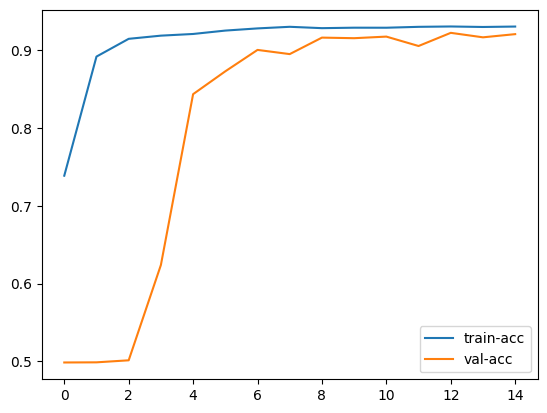

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'],label="train-acc")
plt.plot(history.history['val_acc'],label="val-acc")
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

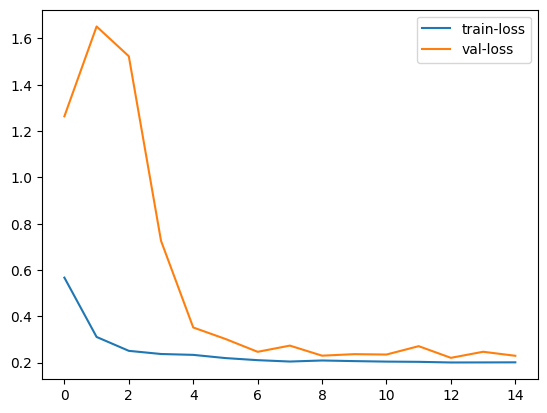

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(history.history['loss'],label="train-loss")
plt.plot(history.history['val_loss'],label="val-loss")
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

In [ ]:
model=load_model('Models/CNN_model.h5')
model

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import legacy
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import os

IMAGE_SIZE = 96
BATCH_SIZE = 16
DATASET_DIR = "Dataset/"


In [ ]:
# Training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATASET_DIR,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

# Validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATASET_DIR,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

# Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1)
])

# Preprocessing for MobileNetV2
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

# Apply augmentation + preprocessing
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.map(lambda x, y: (preprocess_input(data_augmentation(x, training=True)), y),
                        num_parallel_calls=AUTOTUNE).prefetch(AUTOTUNE)

val_ds = val_ds.map(lambda x, y: (preprocess_input(x), y),
                    num_parallel_calls=AUTOTUNE).prefetch(AUTOTUNE)


Found 27558 files belonging to 2 classes.
Using 22047 files for training.
Found 27558 files belonging to 2 classes.
Using 5511 files for validation.


In [ ]:
# Training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Dataset/",
    labels="inferred",
    label_mode="categorical",
    image_size=(224, 224),   # <-- FIXED
    batch_size=32,
    validation_split=0.2,
    subset="training",
    seed=42
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Dataset/",
    labels="inferred",
    label_mode="categorical",
    image_size=(224, 224),   # <-- FIXED
    batch_size=32,
    validation_split=0.2,
    subset="validation",
    seed=42
)


# Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1)
])

# Preprocessing for MobileNetV2
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

# Apply augmentation + preprocessing
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.map(lambda x, y: (preprocess_input(data_augmentation(x, training=True)), y),
                        num_parallel_calls=AUTOTUNE).prefetch(AUTOTUNE)

val_ds = val_ds.map(lambda x, y: (preprocess_input(x), y),
                    num_parallel_calls=AUTOTUNE).prefetch(AUTOTUNE)


Found 27558 files belonging to 2 classes.
Using 22047 files for training.
Found 27558 files belonging to 2 classes.
Using 5511 files for validation.


In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
base_model.trainable = False  # Freeze base for transfer learning

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer=legacy.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',  # <- FIX HERE
    metrics=['accuracy']
)


In [ ]:
import tensorflow as tf
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.layers import GlobalAveragePooling2D, Dense, Dropout
from keras.models import Model
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam   # ✔ FAST optimizer for M1/M2

# -----------------------
# CONFIG
# -----------------------
IMAGE_SIZE = 125
BATCH_SIZE = 64
DATASET_DIR = "Dataset/"


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


In [ ]:
import tensorflow as tf
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from keras.models import Model
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam   # FAST on M1/M2

IMAGE_SIZE = 125
BATCH_SIZE = 64
DATASET_DIR = "Dataset/"

# -----------------------
# DATASET + AUGMENTATION (Improved)
# -----------------------
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # ✔ correct for VGG16
    rescale=1./255,
    rotation_range=15,        # ✔ smaller = better medical fidelity
    width_shift_range=0.15,
    height_shift_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    validation_split=0.2
)

train_set = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

val_set = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)

# -----------------------
# VGG16 MODEL (Improved)
# -----------------------
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)
)
base_model.trainable = False    # keep frozen for stability

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)              # ✔ reduces overfitting
x = Dense(64, activation='relu')(x)
output = Dense(2, activation='softmax')(x)  # ✔ correct for 2 classes

model = Model(inputs=base_model.input, outputs=output)

# -----------------------
# COMPILE (Better optimizer)
# -----------------------
model.compile(
    optimizer=Adam(1e-4),     # ✔ fast & stable
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# -----------------------
# CALLBACKS
# -----------------------
checkpoint = ModelCheckpoint(
    "Models/VGG16_model.h5",
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

early = EarlyStopping(
    monitor='val_accuracy',
    patience=6,
    restore_best_weights=True,
    verbose=1
)

# -----------------------
# TRAIN (FAST)
# -----------------------
history = model.fit(
    train_set,
    validation_data=val_set,
    epochs=15,
    callbacks=[checkpoint, early],
    verbose=1
)


Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.
Epoch 1/15
345/345 [==============================] - ETA: 0s - loss: 0.5775 - accuracy: 0.6888
Epoch 1: val_accuracy improved from -inf to 0.80762, saving model to Models/VGG16_model.h5
345/345 [==============================] - 744s 2s/step - loss: 0.5775 - accuracy: 0.6888 - val_loss: 0.4314 - val_accuracy: 0.8076
Epoch 2/15


/Users/eishafahad/Downloads/Malaria_Detection_FYP/ml_env/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


345/345 [==============================] - ETA: 0s - loss: 0.4137 - accuracy: 0.8156
Epoch 2: val_accuracy improved from 0.80762 to 0.82740, saving model to Models/VGG16_model.h5
345/345 [==============================] - 754s 2s/step - loss: 0.4137 - accuracy: 0.8156 - val_loss: 0.3860 - val_accuracy: 0.8274
Epoch 3/15
345/345 [==============================] - ETA: 0s - loss: 0.3705 - accuracy: 0.8363
Epoch 3: val_accuracy improved from 0.82740 to 0.84610, saving model to Models/VGG16_model.h5
345/345 [==============================] - 762s 2s/step - loss: 0.3705 - accuracy: 0.8363 - val_loss: 0.3543 - val_accuracy: 0.8461
Epoch 4/15
345/345 [==============================] - ETA: 0s - loss: 0.3483 - accuracy: 0.8484
Epoch 4: val_accuracy improved from 0.84610 to 0.85263, saving model to Models/VGG16_model.h5
345/345 [==============================] - 996s 3s/step - loss: 0.3483 - accuracy: 0.8484 - val_loss: 0.3419 - val_accuracy: 0.8526
Epoch 5/15
345/345 [=========================

In [ ]:
import numpy as np
img = image.load_img('Dataset/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png', target_size=(150, 150))
img_array = image.img_to_array(img).astype('float32')/255
i
img_batch = np.expand_dims(img_array, axis=0)
print(img_batch.shape)

img_preprocessed = preprocess_input(img_batch)


(1, 150, 150, 3)


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import backend as K

import os
import numpy as np
import cv2
from PIL import Image
from array import array

# Load model
model = load_model("Models/CNN_model.h5")

# Check image data format
print("Image data format:", K.image_data_format())


Image data format: channels_last


In [ ]:
path = "Dataset/Parasitized"
file_path = path+"/"+"C33P1thinF_IMG_20150619_114756a_cell_179.png"
img = cv2.imread(file_path)
img = Image.fromarray(img, 'RGB')

In [ ]:
img = img.resize((150, 150))
x=image.img_to_array(img)
x = np.expand_dims(x, axis=0)
a=np.argmax(model.predict(x),axis=1)
if(a==1):
  print('Uninfected')
else:
  print('Infected')

1/1 [==============================] - 0s 59ms/step
Uninfected


In [ ]:
path = "Dataset/Uninfected"
file_path = path+"/"+"C100P61ThinF_IMG_20150918_144104_cell_128.png"
img = cv2.imread(file_path)
img = Image.fromarray(img, 'RGB')

In [ ]:
img = img.resize((150, 150))
x=image.img_to_array(img)
x = np.expand_dims(x, axis=0)
a=np.argmax(model.predict(x),axis=1)
if(a==1):
  print('Uninfected')
else:
  print('Infected')

1/1 [==============================] - 0s 12ms/step
Uninfected


In [ ]:

# ---------------------------
# 1) Load saved model
# ---------------------------
model_path = "Models/CNN_model.h5"
model = load_model(model_path)
print("Model Loaded Successfully!")


Model Loaded Successfully!


In [ ]:

# ---------------------------
# 2) Prepare ONLY validation data
# ---------------------------
val_dir = "Dataset/"        # your dataset main folder
image_size = 150

val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(image_size, image_size),
        batch_size=32,
        class_mode='categorical',
        shuffle=False,                # IMPORTANT (accuracy sahi ayegi)
        subset='validation'
)


Found 5510 images belonging to 2 classes.


In [ ]:

# ---------------------------
# 3) Predict on validation set
# ---------------------------
y_true = validation_generator.classes
class_names = list(validation_generator.class_indices.keys())

y_pred_probs = model.predict(validation_generator)
y_pred = np.argmax(y_pred_probs, axis=1)



173/173 [==============================] - 13s 76ms/step


In [ ]:

# ---------------------------
# 4) Print Accuracy + Report
# ---------------------------
print("\nAccuracy:", accuracy_score(y_true, y_pred))
print("\nClassification Report:(CNN)\n")
print(classification_report(y_true, y_pred, target_names=class_names))




Accuracy: 0.9266787658802178

Classification Report:(CNN)

              precision    recall  f1-score   support

 Parasitized       0.98      0.87      0.92      2755
  Uninfected       0.89      0.98      0.93      2755

    accuracy                           0.93      5510
   macro avg       0.93      0.93      0.93      5510
weighted avg       0.93      0.93      0.93      5510



In [ ]:
# ---------------------------
# 5) Confusion Matrix
# ---------------------------
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_true, y_pred))


Confusion Matrix:

[[2407  348]
 [  56 2699]]


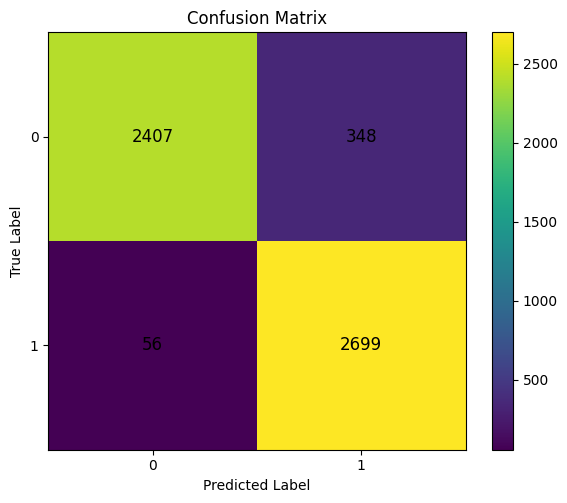

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()

# Labels
tick_marks = np.arange(len(np.unique(y_true)))
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)

# Axis labels
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

# Add numbers inside squares
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]),
                 ha='center', va='center', fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import backend as K

import os
import numpy as np
import cv2
from PIL import Image
from array import array

model = load_model("Models/VGG16_model.h5")

print("Image data format:", K.image_data_format())


Image data format: channels_last


In [ ]:
path = "Dataset/Parasitized"
file_path = path+"/"+"C33P1thinF_IMG_20150619_114756a_cell_179.png"
img = cv2.imread(file_path)
img = Image.fromarray(img, 'RGB')

In [ ]:
img = img.resize((224, 224))        # FIX SIZE for VGG16
x = image.img_to_array(img)
x = x / 255.0                       # normalize (important)
x = np.expand_dims(x, axis=0)

a = np.argmax(model.predict(x), axis=1)

if a == 1:
    print('Uninfected')
else:
    print('Infected')


1/1 [==============================] - 0s 232ms/step
Infected


In [ ]:
path = "Dataset/Uninfected"
file_path = path+"/"+"C100P61ThinF_IMG_20150918_144104_cell_128.png"
img = cv2.imread(file_path)
img = Image.fromarray(img, 'RGB')

In [ ]:
img = img.resize((125, 125))
x=image.img_to_array(img)
x = np.expand_dims(x, axis=0)
a=np.argmax(model.predict(x),axis=1)
if(a==1):
  print('Uninfected')
else:
  print('Infected')

1/1 [==============================] - 0s 62ms/step
Uninfected


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np


In [ ]:
# ---------------------------
# 1) Load saved VGG16 model
# ---------------------------
model_path = "Models/VGG16_model.h5"
model = load_model(model_path)
print("VGG16 Model Loaded Successfully!")


VGG16 Model Loaded Successfully!


In [ ]:

# ---------------------------
# 2) Prepare validation data
# ---------------------------
val_dir = "Dataset/"        # your dataset main folder
image_size = 224            # VGG16 requires 224×224

val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(image_size, image_size),
        batch_size=32,
        class_mode='categorical',
        shuffle=False,                # IMPORTANT (accuracy sahi ayegi)
        subset='validation'
)


Found 5510 images belonging to 2 classes.


In [ ]:

# ---------------------------
# 3) Predict on validation set
# ---------------------------
y_true = validation_generator.classes
class_names = list(validation_generator.class_indices.keys())

y_pred_probs = model.predict(validation_generator)
y_pred = np.argmax(y_pred_probs, axis=1)




173/173 [==============================] - 556s 3s/step


In [ ]:
# ---------------------------
# 4) Print Accuracy + Report
# ---------------------------
print("\nAccuracy:", accuracy_score(y_true, y_pred))
print("\nClassification Report:(VGG16)\n")
print(classification_report(y_true, y_pred, target_names=class_names))



Accuracy: 0.8332123411978222

Classification Report:(VGG16)

              precision    recall  f1-score   support

 Parasitized       0.96      0.69      0.81      2755
  Uninfected       0.76      0.97      0.85      2755

    accuracy                           0.83      5510
   macro avg       0.86      0.83      0.83      5510
weighted avg       0.86      0.83      0.83      5510



In [ ]:

# ---------------------------
# 5) Confusion Matrix
# ---------------------------
cm = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:\n")
print(cm)



Confusion Matrix:

[[1907  848]
 [  71 2684]]


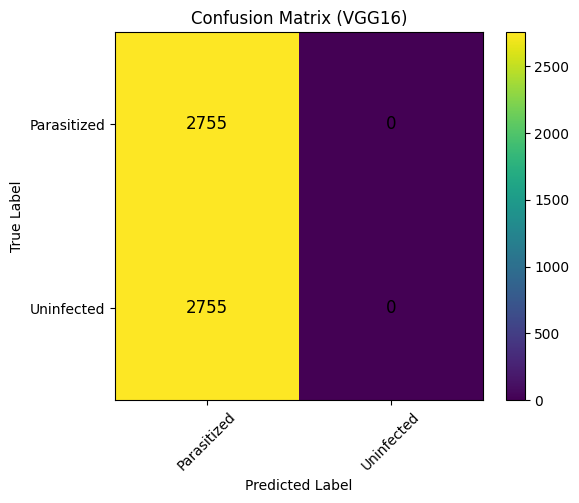

In [ ]:
import matplotlib.pyplot as plt

# ---------------------------
# 6) Plot Confusion Matrix
# ---------------------------
plt.figure(figsize=(6, 5))
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix (VGG16)")
plt.colorbar()

# Labels
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add numbers inside squares
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]),
                 ha='center', va='center', fontsize=12)

plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()